In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import multipendulum as mp

# this is necessary to use 3d plots
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## The latest revision to the API

In addition to making a helper function to run a pendulum instance, I'm in the process of moving the plots out of the MultiPendulum class. The `phase_plot` example below shows the general idea; note that I've also increased the flexibility a bit to allow the use of any pair of coordinates in making a 2d slice of phase space.

We probably ought to have a 3d slice of phase space plot, as well.

In [2]:
ic = ((0, 0.5), (0,0))
double = mp.run_mp(ic)

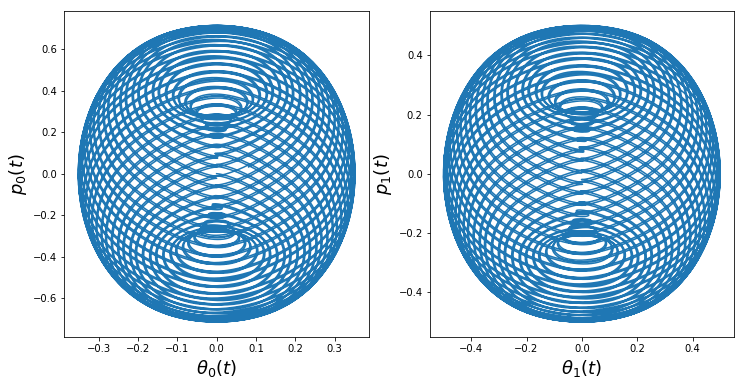

In [3]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(6)

mp.phase_plot(double, ax[0], double.q[0], double.p[0])
mp.phase_plot(double, ax[1], double.q[1], double.p[1])

In [4]:
double.timedf.describe()

,thetadot_0(t),theta_0(t),thetadot_1(t),theta_1(t),p_0(t),p_1(t)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000764,-0.000017,-0.001606,-0.000615,0.000010,-0.000225
std,1.061238,0.174888,1.506011,0.252537,0.384331,0.272723
min,-2.024294,-0.351566,-2.889636,-0.499907,-0.715741,-0.501137
25%,-0.879192,-0.124699,-1.224726,-0.183112,-0.309466,-0.223485
50%,0.001931,-0.000081,-0.004216,0.000029,-0.001274,0.000413
75%,0.878819,0.124709,1.223110,0.181708,0.311842,0.223112
max,2.024141,0.351634,2.890031,0.500000,0.715474,0.501246


The canonical momenta seem like a better choice than the angular velocities for phase space plots and calculations, since the magnitudes seem more comparable to those of the angles.

### Poincare sections

Poincare sections are pretty easy to generate. Pass in a `MultiPendulum` object and an `Axes3D`.

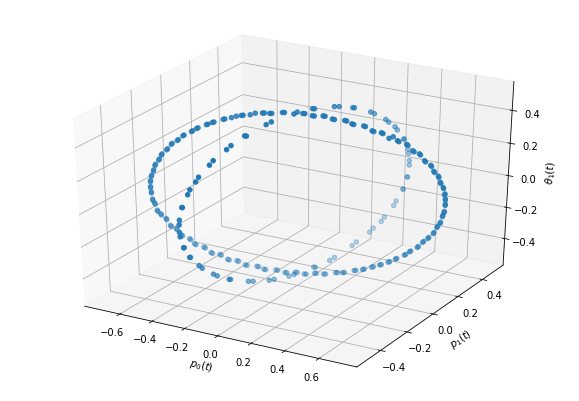

In [6]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

You get significantly better looking results if you run the simulation longer than we have been. I've added some functionality to the `run_mp` function to make this simpler.

In [9]:
double.times = np.linspace(0, 1000, 100001)

double.integrate_kane()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

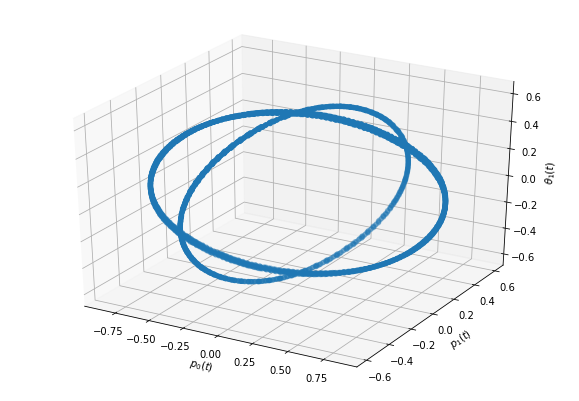

In [2]:
ic = ((0, 0.6), (0,0))
double = mp.run_mp(ic, tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

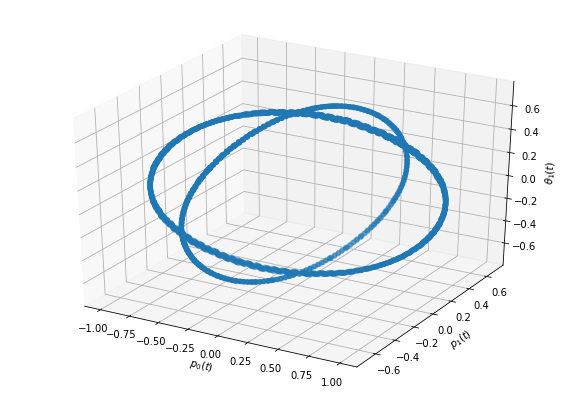

In [3]:
ic = ((0, 0.7), (0,0))
double = mp.run_mp(ic, tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

Looks like there might be something interesting going on here, but it's hard to say without zooming in. To tie in to our other plots, let's make the same list of inital conditions.

In [4]:
iclist = [((theta0, 0.0),(0,0)) for theta0 in np.linspace(0.1, 1.75, 640)]

Which sets of initial conditions would be interesting to look at? Let's go back to our plot showing the dominance of each kind of growth for some suggestions. Recall: we expect those cases which are better matched by an exponential growth model to be chaotic, and those with power-law growth to not be.

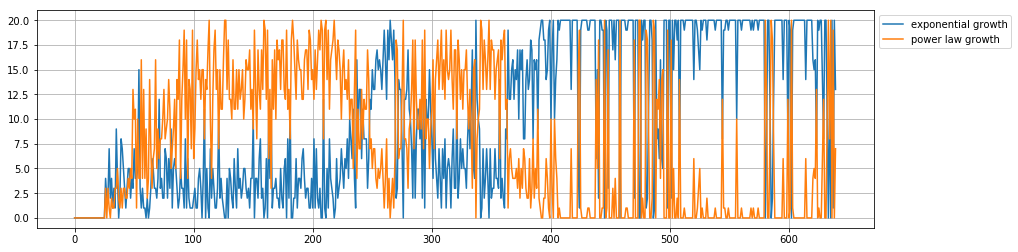

In [130]:
df640 = pd.read_pickle("theta0-640.pkl")

df640.lins.plot(figsize=(15,4), label="exponential growth")
ax = df640.logs.plot(label="power law growth")
#ax.set_xlim(200,300)
ax.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

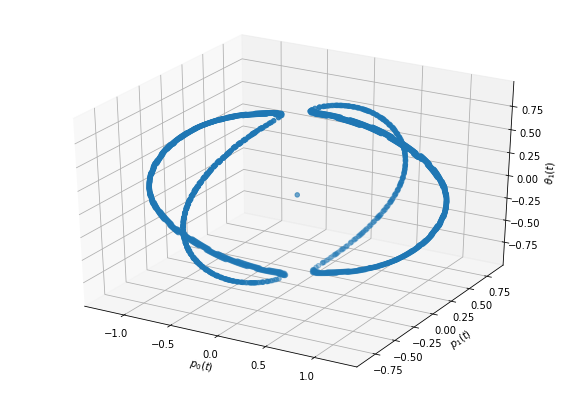

In [5]:
double = mp.run_mp(iclist[200], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

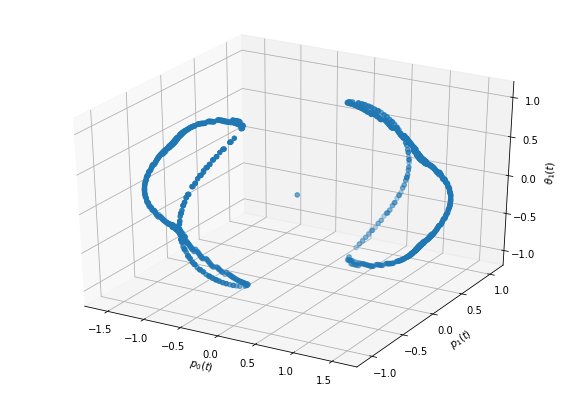

In [6]:
double = mp.run_mp(iclist[260], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

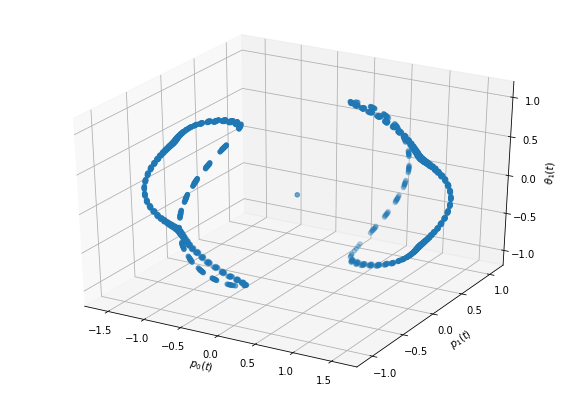

In [13]:
double = mp.run_mp(iclist[261], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

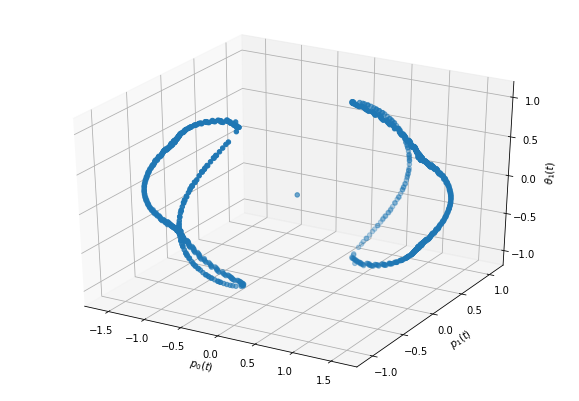

In [14]:
double = mp.run_mp(iclist[262], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

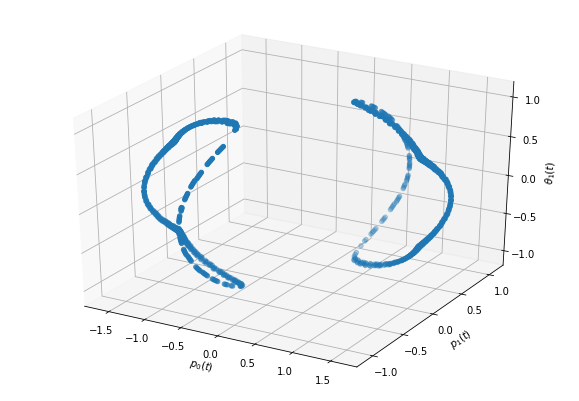

In [15]:
double = mp.run_mp(iclist[263], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

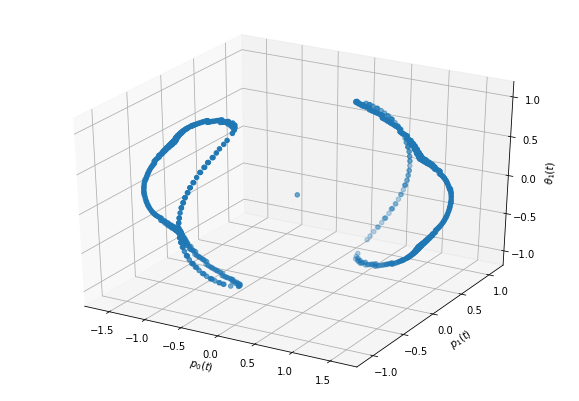

In [16]:
double = mp.run_mp(iclist[264], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

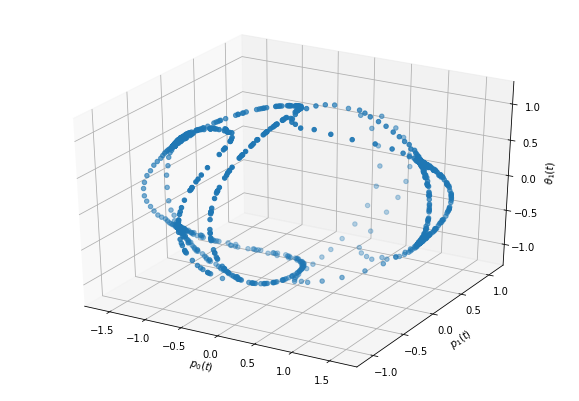

In [7]:
double = mp.run_mp(iclist[265], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

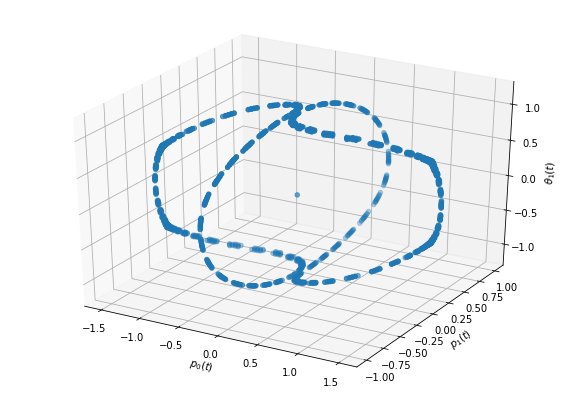

In [17]:
double = mp.run_mp(iclist[266], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

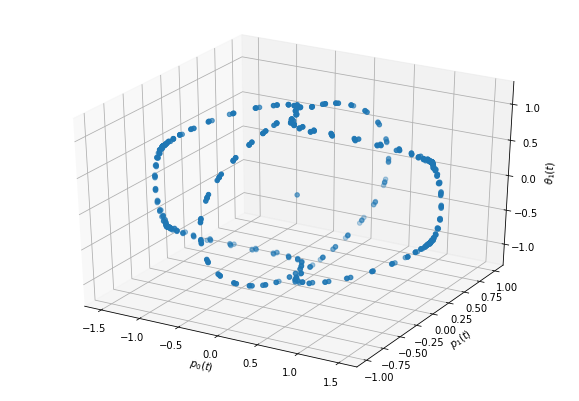

In [28]:
double = mp.run_mp(iclist[266], tmax=400, nsteps=40000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

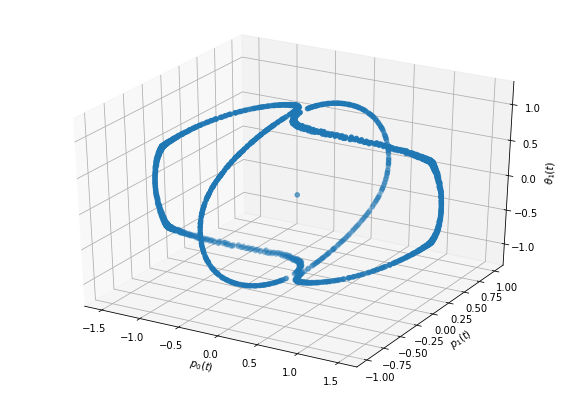

In [18]:
double = mp.run_mp(iclist[267], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

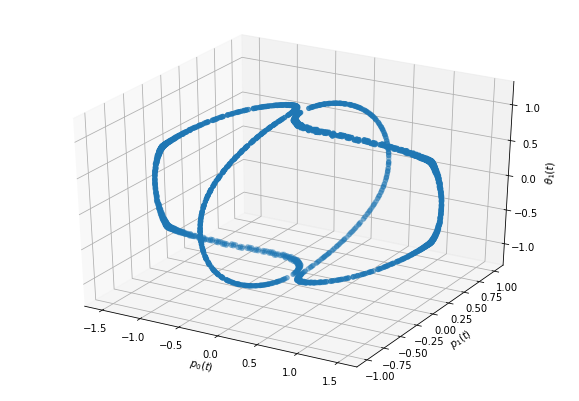

In [19]:
double = mp.run_mp(iclist[268], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

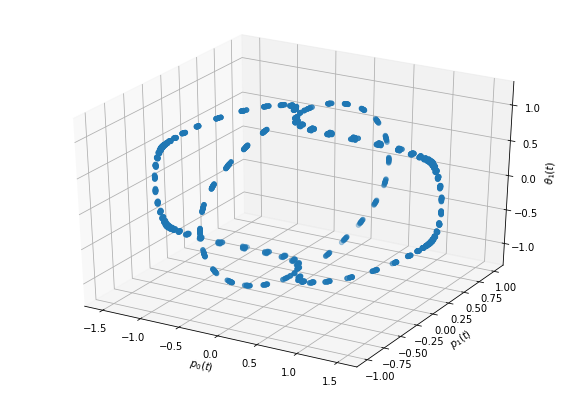

In [20]:
double = mp.run_mp(iclist[269], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

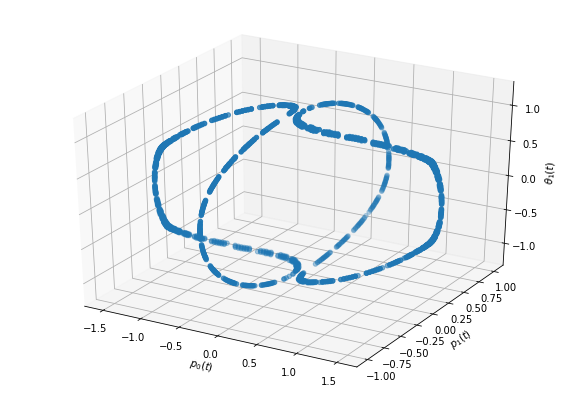

In [21]:
double = mp.run_mp(iclist[270], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

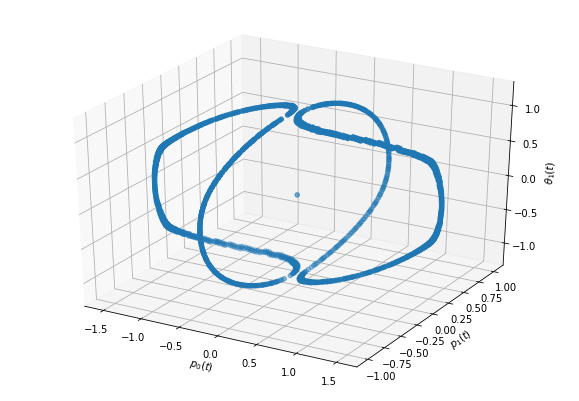

In [22]:
double = mp.run_mp(iclist[271], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

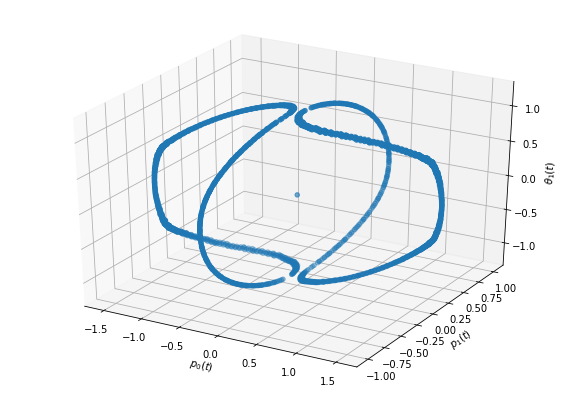

In [23]:
double = mp.run_mp(iclist[272], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

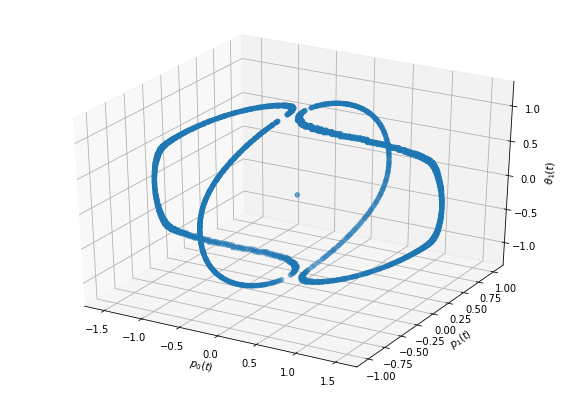

In [24]:
double = mp.run_mp(iclist[273], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

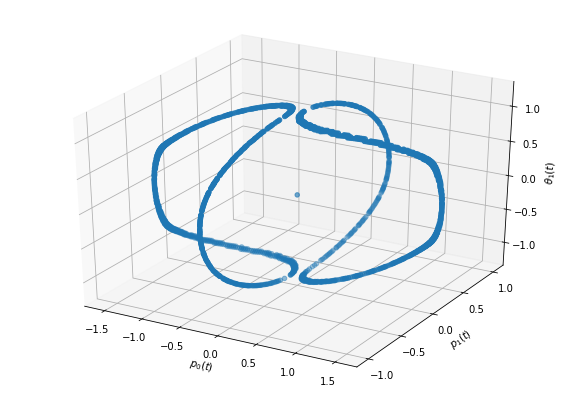

In [25]:
double = mp.run_mp(iclist[274], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

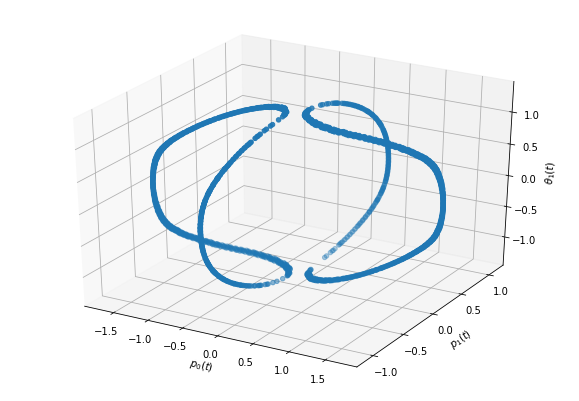

In [30]:
double = mp.run_mp(iclist[300], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

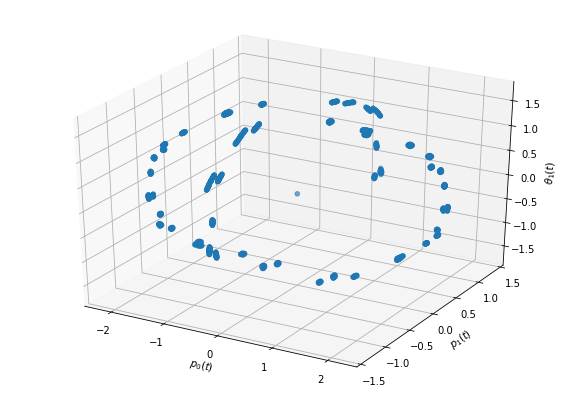

In [31]:
double = mp.run_mp(iclist[400], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

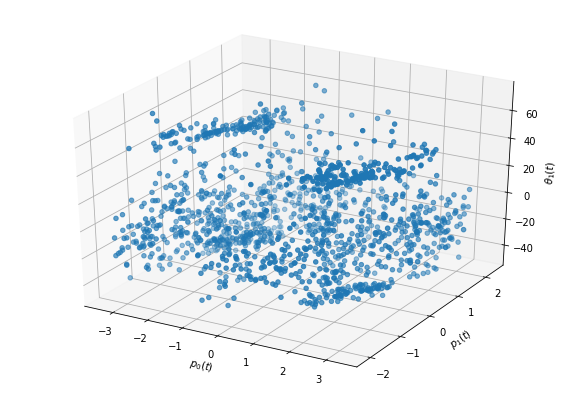

In [35]:
double = mp.run_mp(iclist[625], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

Lots to see and talk about in these plots. The Poincare section does make it easier to see some of the changes in structure as we increase the energy. It might be cool to generate an animation showing the transition in structure.


## Box counting

Now, on to the real topic of this notebook. The simplest naive approach is to just make a regular grid and count the number of boxes occupied by points.  Something like this:

In [47]:
cols = list(double.q) + list(double.p)
nside = 10000
boxids = []

for col in cols:
    minval = double.timedf[col].min()
    maxval = double.timedf[col].max()
    spacing = (maxval - minval)/nside
    boxids.append(((double.timedf[col]-minval)//spacing).astype(int))
    
N = len(set(zip(*boxids)))
np.log(N)/np.log(1/spacing)

1.50341736314705

In [41]:
len(set(zip(*boxids)))

5012

The last line in the bigger cell shows the approximation to the box counting dimension: $$\lim_{\varepsilon\rightarrow 0} {\log{N(\varepsilon)} \over \log\left(1/\varepsilon\right)}$$

Just running the spacing to near zero and saying we're taking the limit won't work here because we are using a discrete approximation (our time series) to a continuous mathematical object (the actual trajectory).

As it is, this method will systematically underestimate the dimension. There are probably ways around this, but we'll have to look into that after we get it working.

Two functions follow. The first calculates an estimate of box counting (or Minkowski-Bouligand) dimension by counting boxes and computing the ratio of logarithms, and the second extrapolates via a linear fit down to zero box size.

In [104]:
def count_boxes(pend, nside):
    cols = list(pend.q) + list(pend.p)

    boxids = []
    for col in cols:
        minval = pend.timedf[col].min()
        maxval = pend.timedf[col].max()
        delta = maxval - minval
        spacing = delta/nside
        boxids.append(((pend.timedf[col]-minval)//spacing).astype(int))
    N = len(set(zip(*boxids)))
    
    return np.log(N)/np.log(1/spacing)


def MB_dimension(ic):
    """Estimate the Minkowski–Bouligand dimension by box counting
    
    Parameters:
    -----------
    ic : tuple of tuples of floats
        initial conditions for the system
        example: ((0.1, 0.1), (0.0, 0.0))

    Returns:
    --------
    float The estimated box counting dimension
    """
    import numpy as np
    import multipendulum as mp
    from scipy.optimize import curve_fit
    
    pend = mp.run_mp(ic, tmax=1000, nsteps=100000)
    nsides = np.linspace(5, 75, 25).astype(int)
    dim = [count_boxes(pend, nside) for nside in nsides]
    minval = pend.timedf[col].min()
    maxval = pend.timedf[col].max()
    delta = maxval - minval

    popt, pcov = curve_fit(linear, delta/nsides, dim)
    return popt[1]

[]

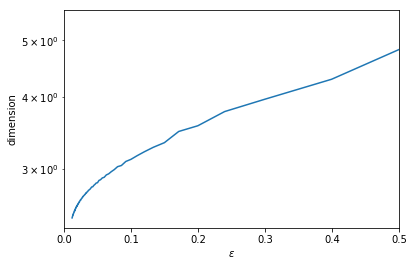

In [63]:
#double = mp.run_mp(iclist[125], tmax=1000, nsteps=100000)
nsides = np.linspace(1, 100, 98).astype(int)

dim = [count_boxes(double, nside) for nside in nsides]

minval = double.timedf[col].min()
maxval = double.timedf[col].max()
delta = maxval - minval
plt.plot(delta/nsides, dim)
plt.xlabel(r"$\epsilon$")
plt.ylabel("dimension")
plt.xlim((0,0.5))
plt.semilogy()

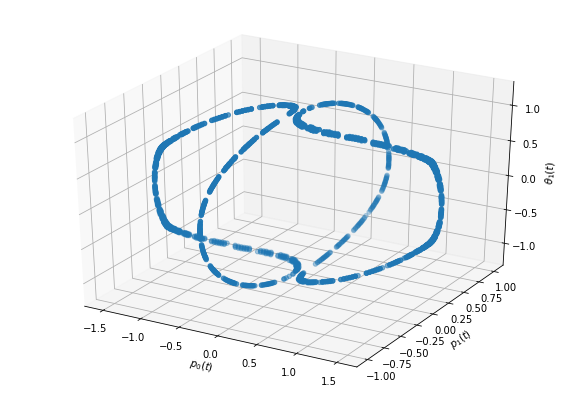

In [88]:
double = mp.run_mp(iclist[270], tmax=1000, nsteps=100000)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
mp.poincare(double, ax)

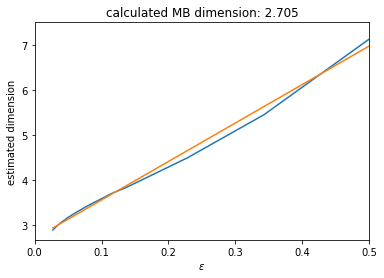

In [100]:
nsides = np.linspace(4, 75, 25).astype(int)

dim = [count_boxes(double, nside) for nside in nsides]

minval = double.timedf[col].min()
maxval = double.timedf[col].max()
delta = maxval - minval

popt, pcov = curve_fit(linear, delta/nsides, dim)

plt.plot(delta/nsides, dim)
plt.xlabel(r"$\epsilon$")
plt.ylabel("estimated dimension")
plt.xlim((0,0.5))
plt.title("calculated MB dimension: {:5.3f}".format(popt[1]))
plt.plot(delta/nsides, linear(delta/nsides, *popt))


In [90]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

In [91]:
popt, pcov = curve_fit(linear, delta/nsides, dim)
popt

array([ 8.55849748,  2.7048584 ])

In [92]:
pcov

array([[ 0.01738641, -0.00169926],
       [-0.00169926,  0.00038144]])

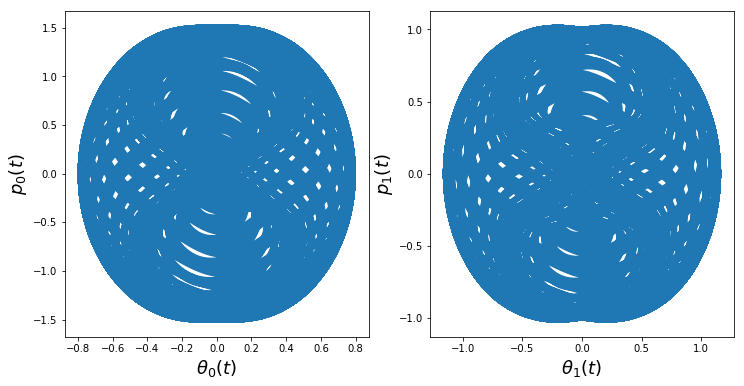

In [93]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(6)

mp.phase_plot(double, ax[0], double.q[0], double.p[0])
mp.phase_plot(double, ax[1], double.q[1], double.p[1])

In [105]:
MB_dimension(iclist[0])

1.9164520659404671

In [106]:
MB_dimension(iclist[270])

2.7433446999757582

In [107]:
MB_dimension(iclist[265])

2.7677815105710826

In [110]:
MB_dimension(iclist[600])

-2.6553033071665397

Yeah, no. A negative dimensionality isn't possible. We can get rid of it (and the high uncertainties in the fitting parameters not shown here) by ignoring measures with the largest few box sizes.

In [114]:
double = mp.run_mp(iclist[605], tmax=1000, nsteps=100000)
nsides = np.linspace(5, 75, 25).astype(int)

dim = [count_boxes(double, nside) for nside in nsides]

minval = double.timedf[col].min()
maxval = double.timedf[col].max()
delta = maxval - minval
popt, pcov = curve_fit(linear, delta/nsides[3:], dim[3:])
popt, pcov

(array([ 16.52526827,   3.15988809]), array([[ 0.01604855, -0.00215317],
        [-0.00215317,  0.00038409]]))

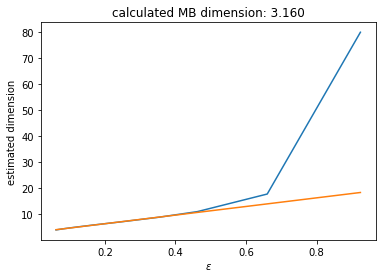

In [115]:
plt.plot(delta/nsides, dim)
plt.xlabel(r"$\epsilon$")
plt.ylabel("estimated dimension")
#plt.xlim((0,0.5))
plt.title("calculated MB dimension: {:5.3f}".format(popt[1]))
plt.plot(delta/nsides, linear(delta/nsides, *popt))


Okay. So it looks like if the trajectory is closer to being space-filling, the first couple of box-counts end up being spuriously large, which throws off the fit. We can fix that by filtering before fitting.

Additionally, we'll move the definition of the box-counting function into the other one to make it easier to run in parallel.

In [145]:
def MB_dimension(ic):
    """Estimate the Minkowski–Bouligand dimension by box counting
    
    Parameters:
    -----------
    ic : tuple of tuples of floats
        initial conditions for the system
        example: ((0.1, 0.1), (0.0, 0.0))

    Returns:
    --------
    float The estimated box counting dimension
    """
    import numpy as np
    import multipendulum as mp
    from scipy.optimize import curve_fit
    
    def linear(x, a, b):
        return a*x + b
    
    def count_boxes(pend, nside):
        cols = list(pend.q) + list(pend.p)

        boxids = []
        for col in cols:
            minval = pend.timedf[col].min()
            maxval = pend.timedf[col].max()
            delta = maxval - minval
            spacing = delta/nside
            boxids.append(((pend.timedf[col]-minval)//spacing).astype(int))
        N = len(set(zip(*boxids)))
    
        return np.log(N)/np.log(1/spacing)
        
    pend = mp.run_mp(ic, tmax=1000, nsteps=100000)
    nsides = np.linspace(5, 75, 25).astype(int)
    dim = np.array([count_boxes(pend, nside) for nside in nsides])
    minval = pend.timedf[pend.q[0]].min()
    maxval = pend.timedf[pend.q[0]].max()
    delta = maxval - minval

    xdata = delta/nsides[dim<10]
    ydata = dim[dim<10]
    
    popt, pcov = curve_fit(linear, xdata, ydata)
    return popt[1]

In [136]:
MB_dimension(iclist[600])

2.7329991421413173

Let's try it out by looking at our bigger set of initial conditions.

In [173]:
from ipyparallel import Client
clustername = "CQM"
rc = Client(profile=clustername)
len(rc.ids)

80

In [174]:
lbv = rc.load_balanced_view()

In [150]:
iclist = [((theta0, 0.0),(0,0)) for theta0 in np.linspace(0.1, 1.75, 1600)]

In [151]:
boxdimsresult = lbv.map_async(MB_dimension, iclist)

In [152]:
boxdimsresult.wait_interactive()

1600/1600 tasks finished after 2968 s
done


In [180]:
datadf = pd.read_pickle("theta0-1600-100.pkl")
datadf['MBdim'] = boxdimsresult.r
datadf.to_pickle("theta0-1600-100-MB.pkl")

Text(0.5,1,'Energy initially in inner pendulum')

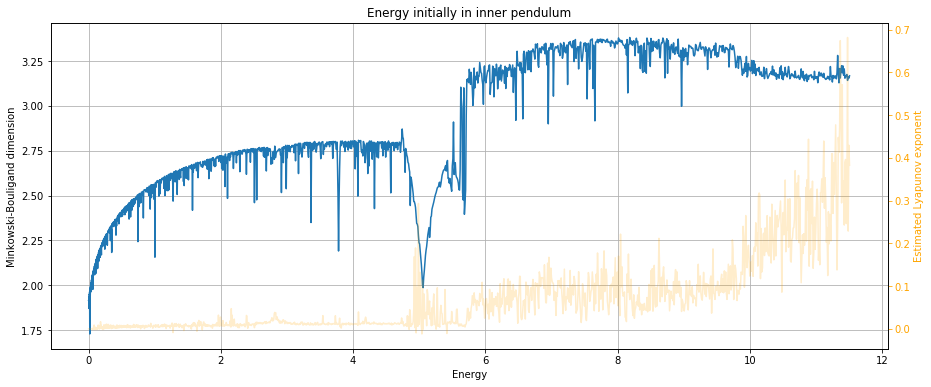

In [171]:
ax = plt.plot(datadf.energy-datadf.energy.iloc[0], boxdimsresult.r, label="Minkowski-Bouligand dimension")
plt.grid()
fig = plt.gcf()
ax = plt.gca()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.set_ylabel("Minkowski-Bouligand dimension")
ax.set_xlabel("Energy")

ax2 = ax.twinx()
ax2.plot(datadf.energy-datadf.energy.iloc[0], datadf.lmean, color="orange", alpha=0.2)
ax2.set_ylabel("Estimated Lyapunov exponent", color="orange")
ax2.tick_params("y", colors="orange")
ax.set_title("Energy initially in inner pendulum")

## $\theta_1$

In [181]:
iclist = [((0.0, theta1),(0,0)) for theta1 in np.linspace(0.1, 3.1, 1600)]
bdres_theta1 = lbv.map_async(MB_dimension, iclist)
bdres_theta1.wait_interactive()

1600/1600 tasks finished after 2995 s
done


Text(0.5,1,'Energy initially in outer pendulum')

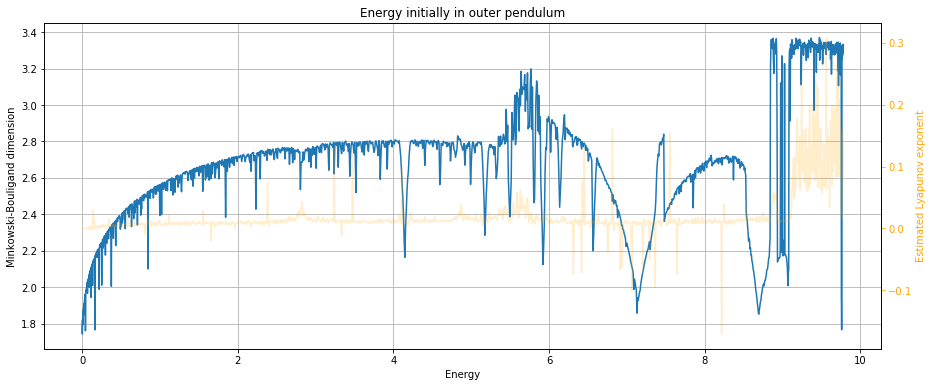

In [182]:
datadf = pd.read_pickle("theta1-1600-20.pkl")
ax = plt.plot(datadf.energy-datadf.energy.iloc[0], bdres_theta1.r, label="Minkowski-Bouligand dimension")
plt.grid()
fig = plt.gcf()
ax = plt.gca()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.set_ylabel("Minkowski-Bouligand dimension")
ax.set_xlabel("Energy")

ax2 = ax.twinx()
ax2.plot(datadf.energy-datadf.energy.iloc[0], datadf.lmean, color="orange", alpha=0.2)
ax2.set_ylabel("Estimated Lyapunov exponent", color="orange")
ax2.tick_params("y", colors="orange")
ax.set_title("Energy initially in outer pendulum")

In [183]:
datadf['MBdim'] = bdres_theta1.r

In [184]:
datadf.head()

,energy,ic,lins,lmean,logs,lstd,pmean,pstd,MBdim
0,-14.690495,"((0.0, 0.1), (0, 0))",0,0.0,0,0.0,0.0,0.0,1.797147
1,-14.689568,"((0.0, 0.101876172608), (0, 0))",0,0.0,0,0.0,0.0,0.0,1.743936
2,-14.688624,"((0.0, 0.103752345216), (0, 0))",0,0.0,0,0.0,0.0,0.0,1.757977
3,-14.687662,"((0.0, 0.105628517824), (0, 0))",0,0.0,0,0.0,0.0,0.0,1.819728
4,-14.686683,"((0.0, 0.107504690432), (0, 0))",0,0.0,0,0.0,0.0,0.0,1.819949


In [185]:
datadf.to_pickle("theta1-1600-20-MB.pkl")